In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wandb
import glob
from tqdm import tqdm_notebook
wandb.login(key= '50c4542f2f5338f2591116005f2e2c8bd9f4d6d6')
api = wandb.Api()
from scipy.ndimage import gaussian_filter1d


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/mkpandey/.netrc


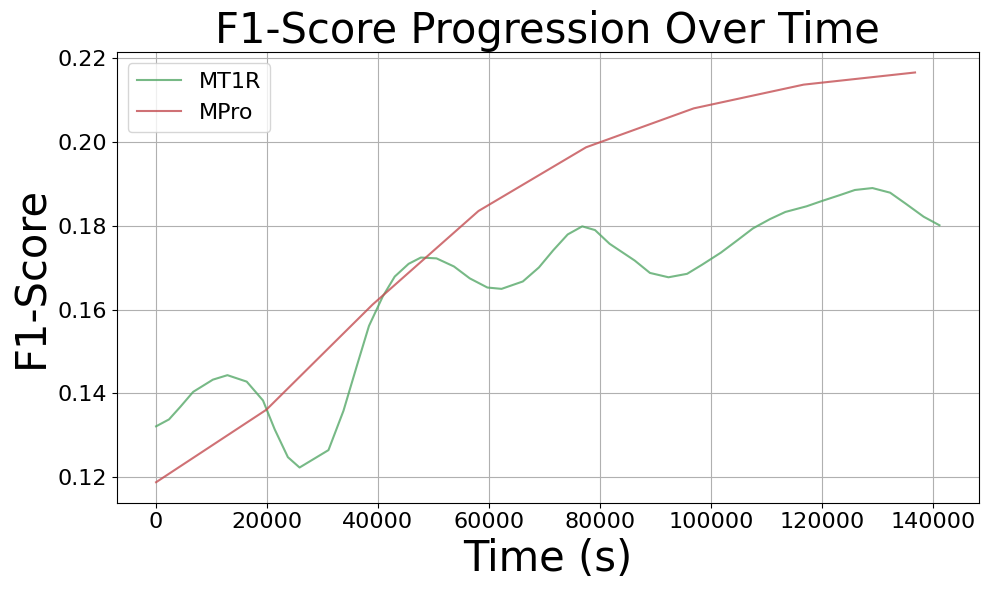

In [13]:
def smooth_data(data, sigma=2):
    """Smooths data using a Gaussian filter."""
    return gaussian_filter1d(data, sigma=sigma)


    
run_ids = {
    'uxf7sez0': 'MT1R',
    'emkielbm': 'MPro'
}

username = 'mohit-pandey-university-of-british-columbia' # 
project_name = 'DDS_AL_2M_AllTgt'

# Colors for LoTPSA and HiTPSA
colors = {
    "MT1R": "#55A868",  # Green
    "MPro": "#C44E52"   # Red
}

# Fetch rewards and steps
f1 = []
steps = []
times = []
labels = []

for run_id, metadata in run_ids.items():
    run = api.run(f"{username}/{project_name}/{run_id}")
    history = run.history()
    if metadata == 'MPro':
        history = history.head(8)
    f1.append(history["AprioriTest_F1"].values)
    steps.append(history["_step"].values)
    times.append(history["_runtime"].values)
    labels.append(metadata) 

# Apply smoothing and plotting
plt.figure(figsize=(10, 6))

for i in range(len(f1)):
    # # Determine the line style and color based on the metadata
    # if "MT1R" in labels[i]:  # FT runs use dashed lines
    #     linestyle = "--"
    # else:  # RTB runs use solid lines
    #     linestyle = "-"
    
    # Determine the color based on LoTPSA or HiTPSA
    if "MT1R" in labels[i]:
        color = colors["MT1R"]
    else:
        color = colors["MPro"]

    smoothed_rewards = smooth_data(f1[i], sigma=2)  # Adjust `sigma` for more/less smoothing
  
    plt.plot(times[i], smoothed_rewards, label=f"{labels[i]}",  color=color, alpha=0.8)

# Customize the plot
plt.title('F1-Score Progression Over Time', fontsize=30)
plt.xlabel('Time (s)', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# plt.savefig('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/VinaAL/Experiments/Final_Regression/mt1r_vs_mpro_f1.png', dpi=350)

# Show the plot
plt.show()

In [11]:
f1

[array([0.12643052, 0.1384083 , 0.12079701, 0.14882227, 0.14859659,
        0.15553236, 0.13915094, 0.14500537, 0.14409606, 0.15735214,
        0.01819299, 0.13442211, 0.15958668, 0.14675325, 0.15514993,
        0.17264574, 0.17368695, 0.17018634, 0.16870273, 0.18133686,
        0.18901099, 0.15131178, 0.16066482, 0.15269461, 0.17699115,
        0.16098622, 0.17272104, 0.17674419, 0.19739953, 0.19032597,
        0.1761658 , 0.15951743, 0.16510067, 0.16678546, 0.16099071,
        0.1745503 , 0.16731017, 0.18611111, 0.17173052, 0.1890411 ,
        0.18764846, 0.17021277, 0.2046285 , 0.17433082, 0.1843044 ,
        0.20175439, 0.19729207, 0.18518519, 0.17541337, 0.175     ]),
 array([0.        , 0.16858238, 0.21504384, 0.20568928, 0.19380282,
        0.20677821, 0.22371579, 0.22313625])]

In [ ]:
run_ids = {
    'uxf7sez0': 'MT1R',
    'emkielbm': 'MPro'
}

username = 'mohit-pandey-university-of-british-columbia' # 
project_name = 'DDS_AL_2M_AllTgt'

# Colors for LoTPSA and HiTPSA
colors = {
    "MT1R": "#55A868",  # Green
    "MPro": "#C44E52"   # Red
}

# Fetch rewards and steps
f1 = []
steps = []
times = []
labels = []

for run_id, metadata in run_ids.items():
    run = api.run(f"{username}/{project_name}/{run_id}")
    history = run.history()
    if metadata == 'MPro':
        history = history.head(8)
    f1.append(history["AprioriTest_F1"].values)
    steps.append(history["_step"].values)
    times.append(history["_runtime"].values)
    labels.append(metadata) 

# Apply smoothing and plotting
plt.figure(figsize=(10, 6))

for i in range(len(f1)):
       
    # Determine the color based on LoTPSA or HiTPSA
    if "MT1R" in labels[i]:
        color = colors["MT1R"]
    else:
        color = colors["MPro"]
    
    plt.plot(times[i], f1[i], label=f"{labels[i]}",  color=color, alpha=1.0)

# Customize the plot
plt.title('F1-Score Progression Over Time', fontsize=30)
plt.xlabel('Time (s)', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/VinaAL/Experiments/Final_Regression/mt1r_vs_mpro_f1.png', dpi=350)

# Show the plot
plt.show()

In [2]:
# AUC ROC
with open('./merged_mpro.pkl', 'rb') as f:
    merged_mpro = pickle.load(f)

with open('./merged_mt1r.pkl', 'rb') as f:
    merged_mt1r = pickle.load(f)

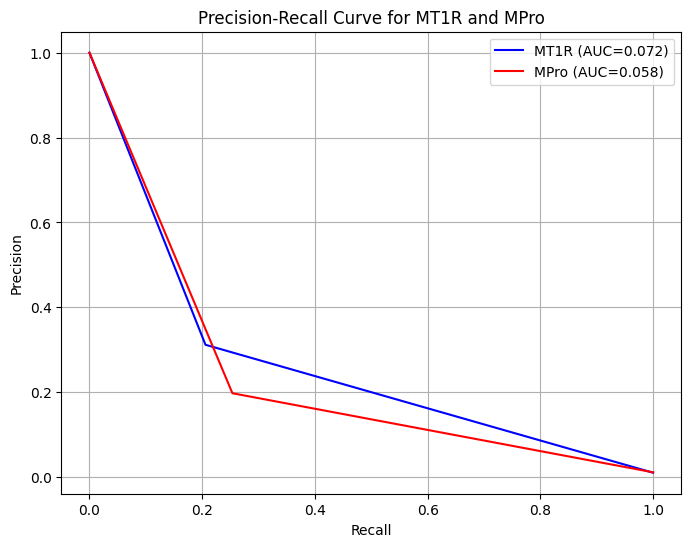

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Sample 100K random molecules from each dataset
sample_mt1r = merged_mt1r.sample(n=100000, random_state=42)
sample_mpro = merged_mpro.sample(n=100000, random_state=42)

# Extract labels and predicted scores
y_true_mt1r = sample_mt1r["labels"].astype(int)  # Convert boolean labels to int (0,1)
y_scores_mt1r = sample_mt1r["pred_label"]

y_true_mpro = sample_mpro["labels"].astype(int)
y_scores_mpro = sample_mpro["pred_label"]

# Compute Precision-Recall curve
precision_mt1r, recall_mt1r, _ = precision_recall_curve(y_true_mt1r, y_scores_mt1r)
precision_mpro, recall_mpro, _ = precision_recall_curve(y_true_mpro, y_scores_mpro)

# Compute Average Precision (AUC for PR curve)
ap_mt1r = average_precision_score(y_true_mt1r, y_scores_mt1r)
ap_mpro = average_precision_score(y_true_mpro, y_scores_mpro)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_mt1r, precision_mt1r, label=f"MT1R (AUC={ap_mt1r:.3f})", color='blue')
plt.plot(recall_mpro, precision_mpro, label=f"MPro (AUC={ap_mpro:.3f})", color='red')

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for MT1R and MPro")
plt.legend()
plt.grid()
plt.show()


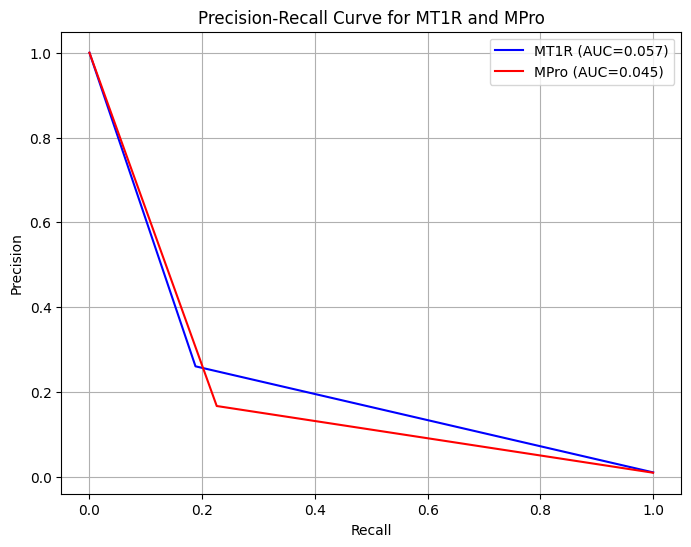

In [5]:
# 1 pct 
# Sample 10K random molecules from top 1pct of each dataset
# sample_mt1r = merged_mt1r.sample(n=10000, random_state=42)
# sample_mpro = merged_mpro.sample(n=10000, random_state=42)
# Define the top 1% threshold for docking scores
threshold_mt1r = merged_mt1r["mt1r_dockscores"].quantile(0.99)
threshold_mpro = merged_mpro["mpro_dockscores"].quantile(0.99)

# Select the top 1% of each dataset
top_mt1r = merged_mt1r[merged_mt1r["mt1r_dockscores"] <= threshold_mt1r]
top_mpro = merged_mpro[merged_mpro["mpro_dockscores"] <= threshold_mpro]

# Sample 10K random molecules from the top 1% of each dataset
sample_mt1r = top_mt1r.sample(n=10000, random_state=42)
sample_mpro = top_mpro.sample(n=10000, random_state=42)

# Extract labels and predicted scores
y_true_mt1r = sample_mt1r["labels"].astype(int)  # Convert boolean labels to int (0,1)
y_scores_mt1r = sample_mt1r["pred_label"]

y_true_mpro = sample_mpro["labels"].astype(int)
y_scores_mpro = sample_mpro["pred_label"]

# Compute Precision-Recall curve
precision_mt1r, recall_mt1r, _ = precision_recall_curve(y_true_mt1r, y_scores_mt1r)
precision_mpro, recall_mpro, _ = precision_recall_curve(y_true_mpro, y_scores_mpro)

# Compute Average Precision (AUC for PR curve)
ap_mt1r = average_precision_score(y_true_mt1r, y_scores_mt1r)
ap_mpro = average_precision_score(y_true_mpro, y_scores_mpro)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_mt1r, precision_mt1r, label=f"MT1R (AUC={ap_mt1r:.3f})", color='blue')
plt.plot(recall_mpro, precision_mpro, label=f"MPro (AUC={ap_mpro:.3f})", color='red')

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for MT1R and MPro")
plt.legend()
plt.grid()
plt.show()


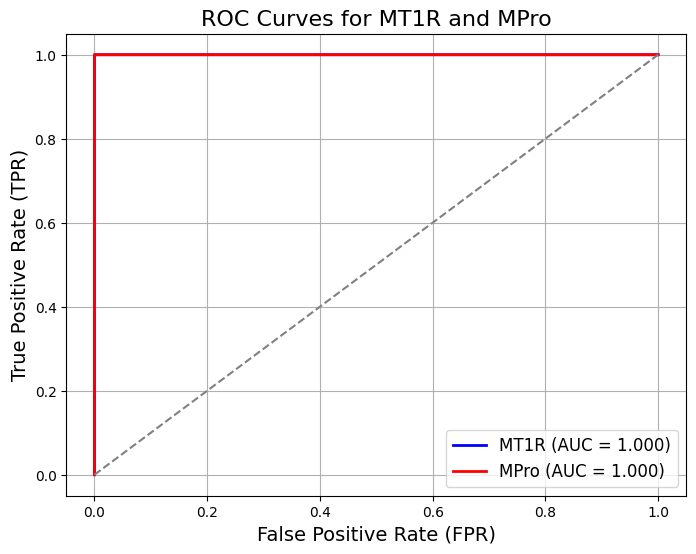

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import random

# Set random seed for reproducibility
random.seed(42)

# Take a random subset of 100K molecules from both datasets
subset_mt1r = merged_mt1r.sample(n=1000000, random_state=42)
subset_mpro = merged_mpro.sample(n=1000000, random_state=42)

# Compute ROC curves
def plot_roc_curve(subset, target_name, color):
    true_labels = subset["pred_label"].astype(int)  # Convert True/False to 1/0
    pred_scores = subset["pred_score"]  # Model scores
    
    fpr, tpr, _ = roc_curve(true_labels, pred_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'{target_name} (AUC = {roc_auc:.3f})')

# Plot ROC curves for both MT1R and MPro
plt.figure(figsize=(8, 6))
plot_roc_curve(subset_mt1r, "MT1R", "blue")
plot_roc_curve(subset_mpro, "MPro", "red")

# Plot random classifier line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.5)

# Customize the plot
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC Curves for MT1R and MPro", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [15]:
subset_mt1r = merged_mt1r.sample(n=100000, random_state=42)
subset_mt1r

,smiles_x,zinc_id,mt1r_dockscores,labels,pred_label,pred_score
8156581,CCNc1cnc(-c2noc(-c3ccc([N+](=O)[O-])c(O)c3)n2)cn1,ZINC000344189634,-13.71,False,0,0.003107
9082692,N#C[C@H]1CN(CC(=O)c2c[nH]c3ncc(Br)cc23)CCO1,ZINC000659902952,-26.58,False,0,0.000050
22671833,O=C(CO)N1CCN(S(=O)(=O)CC[C@@H]2CCCCO2)CC1,ZINC000641409177,1.48,False,0,0.000045
2338005,CN(C)c1cc(NC(=O)N2CC(CF)C2)ncn1,ZINC000417077895,-28.83,False,0,0.000043
31309515,CCCn1nc(C)c(C(=O)N2CCn3ncc(I)c32)c1C,ZINC000411057114,12.39,False,0,0.000083
...,...,...,...,...,...,...
29057169,Cc1noc([C@H]2CCCCN2C(=O)Nc2cc(C)nnc2N(C)C)n1,ZINC000667479456,2.42,False,0,0.000057
32209235,c1c(CN2C[C@]3(CCCO3)[C@H]2C2CC2)onc1C1CC1,ZINC000639212057,-15.31,False,0,0.000041
23424184,Cc1nc(C(C)(C)NC(=O)[C@H]2[C@@H]3CNC[C@@H]32)no1,ZINC000648053516,-4.58,False,0,0.000043
14276284,COc1cccc(N[C@H](c2ncc[nH]2)c2ccccn2)c1,ZINC000447588357,-36.01,True,0,0.084625


In [19]:
subset_mt1r['correct']= subset_mt1r['pred_label'] == subset_mt1r['labels']
subset_mt1r[subset_mt1r.labels==True]['correct'].value_counts()

correct
False    791
True     205
Name: count, dtype: int64